In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Final Results and Insights

- Impactful parameters - Total Bill , Size
- Best model = SVR 
- R2 Score = 0.4427

- Majority orders are of size 2 
- So accordingly ,  more sitting space for 2 people
- Food serving size can be adjusted to 2 people to account for more people and reduce food wastage 
- Reducing cost of food production and thus lead to higher margins
- The busiest days are Weekend ( Sat and Sun) so additional waiters on those days can increase efficiency 
- A waiter is expected to be tipped around dinner times , so performanc during dinner servings should be better and enahnced

# DATA PREPARATION

In [5]:
data=pd.read_csv("tip_dataset.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
data.shape

(244, 7)

In [8]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [10]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Converting categorical values to numerical values 

In [14]:
from sklearn.preprocessing import OneHotEncoder
new_data=pd.get_dummies(data,dtype=int)
new_data.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0


# DATA VISUALISATION for impactful parameters

1. Heatmaps (correlation matrix)

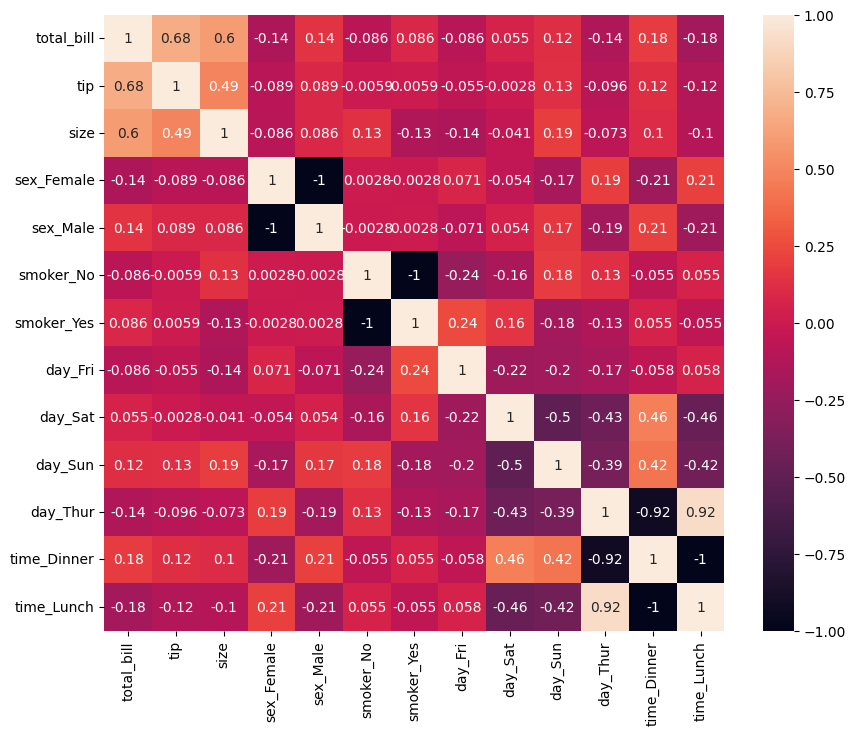

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(new_data.corr(),annot=True)
plt.show()

2. Scatter plot

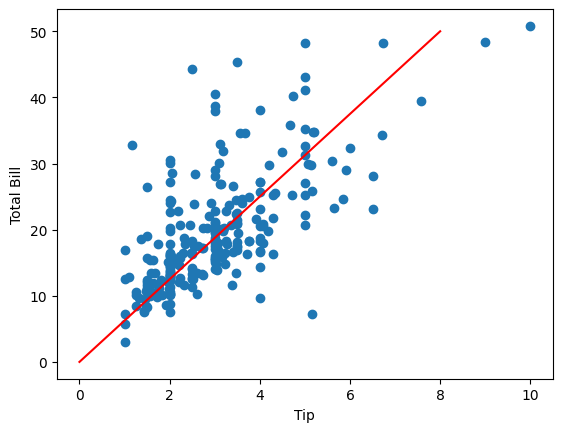

In [40]:
plt.scatter(data.tip,data.total_bill)
plt.plot([0,8],[0,50],color="red")
plt.xlabel("Tip")
plt.ylabel("Total Bill")
plt.show()

In [36]:
data.groupby("size").sum("total_bill")

,total_bill,tip
size,,
1,28.97,5.75
2,2565.89,402.84
3,884.55,128.94
4,1058.70,153.01
5,150.34,20.14
6,139.32,20.90


3. Bar plot

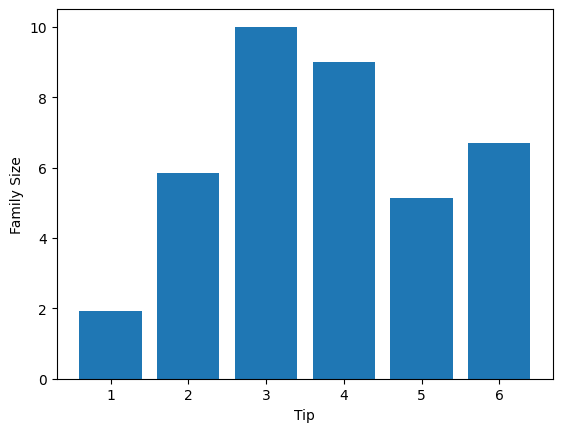

In [35]:
plt.bar(data["size"],data.tip)
plt.xlabel("Tip")
plt.ylabel("Family Size")
plt.show()

4. Pair plots

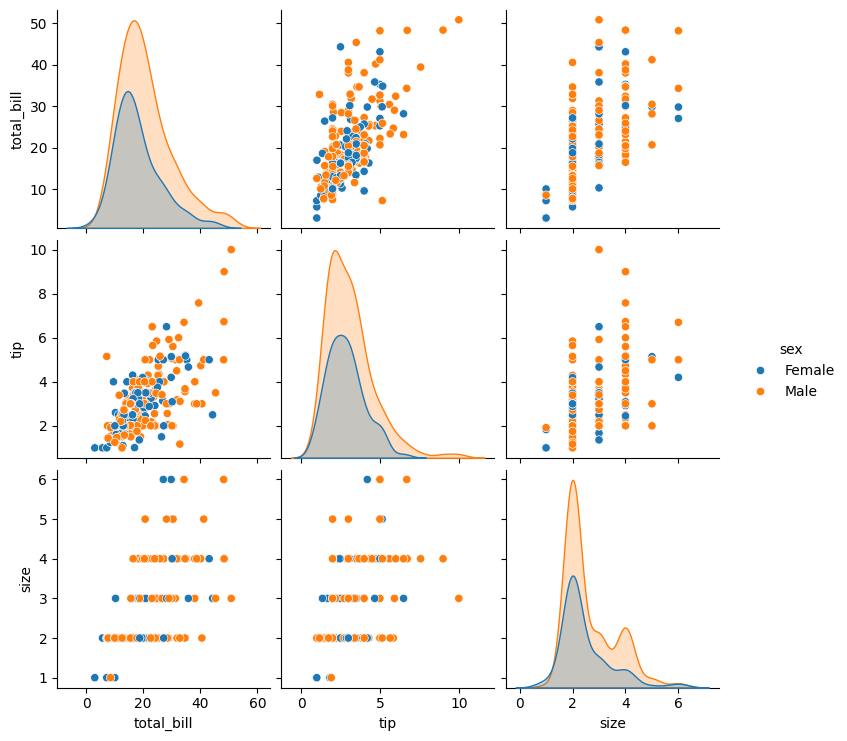

In [43]:
sns.pairplot(data,hue="sex")

# Model Training and Evaluation

In [15]:
from sklearn.model_selection import train_test_split
x=new_data.drop(columns="tip")#features
y=new_data.tip#target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Importing accuracy metrics

In [16]:
from sklearn.metrics import root_mean_squared_error as rmse 
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import r2_score

Regression models evaluated:
- Linear Regression
- Ridge
- Lasso
- Support Vector Classifier (SVR)
- Decision Tree Regressor
- K Neighbours Regressor
- Random Forest Regressor

In [66]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)
print("Root Mean squared error",rmse(y_test,y_pred1))
print("Mean Absolute error",mae(y_test,y_pred1))
print("R2",r2_score(y_test,y_pred1))

Root Mean squared error 0.9653146231105729
Mean Absolute error 0.7171821289867405
R2 0.2930966744126673


In [18]:
from sklearn.linear_model import Ridge
rg=Ridge()
rg.fit(x_train,y_train)
y_pred2=rg.predict(x_test)
print("Root Mean squared error",rmse(y_test,y_pred2))
print("Mean Absolute error",mae(y_test,y_pred2))
print("R2",r2_score(y_test,y_pred2))

Root Mean squared error 0.9636186709731636
Mean Absolute error 0.7160092372765946
R2 0.2955783959818099


In [19]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train,y_train)
y_pred3=ls.predict(x_test)
print("Root Mean squared error",rmse(y_test,y_pred3))
print("Mean Absolute error",mae(y_test,y_pred3))
print("R2",r2_score(y_test,y_pred3))

Root Mean squared error 0.8602968590999885
Mean Absolute error 0.6625712319635088
R2 0.43853986070653217


In [20]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred4=svr.predict(x_test)
print("Root Mean squared error",rmse(y_test,y_pred4))
print("Mean Absolute error",mae(y_test,y_pred4))
print("R2",r2_score(y_test,y_pred4))

Root Mean squared error 0.8570877055290679
Mean Absolute error 0.619884655375311
R2 0.4427208620782802


In [21]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)
y_pred5=dr.predict(x_test)
print("Root Mean squared error",rmse(y_test,y_pred5))
print("Mean Absolute error",mae(y_test,y_pred5))
print("R2",r2_score(y_test,y_pred5))

Root Mean squared error 1.045886407970951
Mean Absolute error 0.8213513513513514
R2 0.17016587046111598


In [22]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred6=knr.predict(x_test)
print("Root Mean squared error",rmse(y_test,y_pred6))
print("Mean Absolute error",mae(y_test,y_pred6))
print("R2",r2_score(y_test,y_pred6))

Root Mean squared error 0.9495356190748675
Mean Absolute error 0.7314864864864864
R2 0.3160178377380929


In [26]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred7=rf.predict(x_test)
print("Root Mean squared error",rmse(y_test,y_pred7))
print("Mean Absolute error",mae(y_test,y_pred7))
print("R2",r2_score(y_test,y_pred7))

Root Mean squared error 0.9780267357341578
Mean Absolute error 0.7719689189189194
R2 0.2743558332479026


Hyper parameter testing for KNR

In [67]:
hyper_data1 = {}
for i in range(5,12):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(x_train,y_train)
    y_preds6 = knr.predict(x_test)
    hyper_data1[i] = round(r2_score(y_test,y_preds6),2)

print(hyper_data1)

{5: 0.32, 6: 0.3, 7: 0.29, 8: 0.35, 9: 0.38, 10: 0.36, 11: 0.38}


Hyperparameter testing for Decision Tree Regressor

In [68]:
hyper_data2 = {}
criterion = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
for i in criterion:
    dtr = DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    y_preds5 = dtr.predict(x_test)
    hyper_data2[i] = round(r2_score(y_test,y_preds5),2)

hyper_data2

{'squared_error': -0.0,
 'friedman_mse': 0.07,
 'absolute_error': 0.14,
 'poisson': 0.02}

Hyperparameter testing for SVR

In [70]:
hyper_data3 = {}
kernel = ["linear", "poly", "rbf", "sigmoid"]
degree = 1
for i in kernel:
    for degree1 in range(1,6):
        svr1 = SVR(kernel=i,degree=degree1)
        svr1.fit(x_train,y_train)
        y_preds4 = svr1.predict(x_test)
        hyper_data3[str(i)+str(degree1)] = round(r2_score(y_test,y_preds4),2)

hyper_data3

{'linear1': 0.33,
 'linear2': 0.33,
 'linear3': 0.33,
 'linear4': 0.33,
 'linear5': 0.33,
 'poly1': 0.41,
 'poly2': 0.29,
 'poly3': 0.02,
 'poly4': -0.42,
 'poly5': -0.54,
 'rbf1': 0.44,
 'rbf2': 0.44,
 'rbf3': 0.44,
 'rbf4': 0.44,
 'rbf5': 0.44,
 'sigmoid1': -10.35,
 'sigmoid2': -10.35,
 'sigmoid3': -10.35,
 'sigmoid4': -10.35,
 'sigmoid5': -10.35}